**WORLD POPULATION DATASET**

***Objective:***
            To find insights, provide key findings and try to answer most of the questions reated to world population data. 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [28]:
data=pd.read_csv("/content/world_population.csv")

In [29]:
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [30]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [31]:
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [32]:
data.shape
#There are 234 rows and 17 columns.

(234, 17)

In [33]:
data.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [34]:
data.columns= ['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022_Population',
       '2020_Population', '2015_Population', '2010_Population',
       '2000_Population', '1990_Population', '1980_Population',
       '1970_Population', 'Area_(km²)', 'Density_(per km²)', 'Growth_Rate',
       'World_Population_Percentage']

In [35]:
data.Country.nunique()

234

In [36]:
data.columns.values

array(['Rank', 'CCA3', 'Country', 'Capital', 'Continent',
       '2022_Population', '2020_Population', '2015_Population',
       '2010_Population', '2000_Population', '1990_Population',
       '1980_Population', '1970_Population', 'Area_(km²)',
       'Density_(per km²)', 'Growth_Rate', 'World_Population_Percentage'],
      dtype=object)

In [37]:
print(data['Continent'].value_counts(),"\n")
print(data.groupby('Continent')['Country'].count(),"\n")

Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64 

Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Country, dtype: int64 



In [38]:
continents = data.groupby(['Continent'],as_index=False)['World_Population_Percentage'].agg([max,sum])
continents

,max,sum
Continent,,
Africa,2.74,17.87
Asia,17.88,59.19
Europe,1.81,9.33
North America,4.24,7.51
Oceania,0.33,0.55
South America,2.70,5.48


Text(0.5, 1.0, 'World_population_by_Continent')

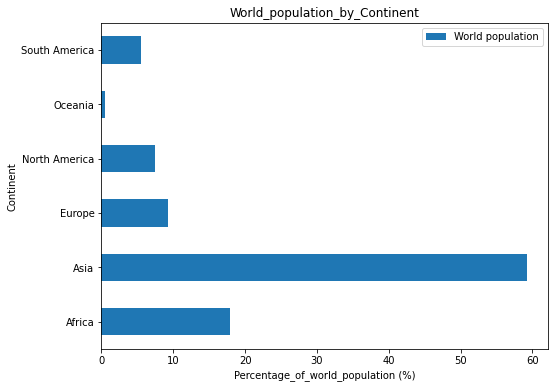

In [39]:
continents.plot(kind="barh", y='sum',figsize=(8,6),label='World population')
plt.xlabel("Percentage_of_world_population (%)")
plt.title("World_population_by_Continent")

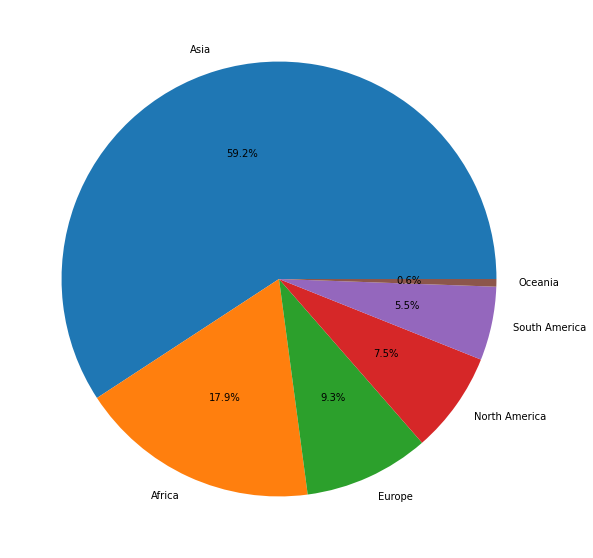

In [40]:
continent_rank=data.groupby(by="Continent").sum().sort_values(by="2022_Population",ascending=False)
fig, ax = plt.subplots(figsize =(20, 10))
x=continent_rank.index
y=continent_rank["2022_Population"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

* Asia population is equivalent to 59.2% of the total world population.
*Asia ranks number 1 among regions of the world by population.




In [41]:
data.groupby('Continent')['Area_(km²)'].sum()

Continent
Africa           30317963
Asia             32138141
Europe           23010411
North America    24244178
Oceania           8515081
South America    17833382
Name: Area_(km²), dtype: int64

**The ten most populous countries in 2022**

In [42]:
top10_countries = data.nlargest(10,['2022_Population','World_Population_Percentage'])
top10_countries

,Rank,CCA3,Country,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per km²),Growth_Rate,World_Population_Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


*These are the details about the top 10 countries with largest population.

In [43]:
data[data['World_Population_Percentage'] < 1].sort_values(by='Rank')

,Rank,CCA3,Country,Capital,Continent,2022_Population,2020_Population,2015_Population,2010_Population,2000_Population,1990_Population,1980_Population,1970_Population,Area_(km²),Density_(per km²),Growth_Rate,World_Population_Percentage
206,20,THA,Thailand,Bangkok,Asia,71697030,71475664,70294397,68270489,63066603,55228410,45737753,35791728,513120,139.7276,1.0013,0.90
220,21,GBR,United Kingdom,London,Europe,67508936,67059474,65224364,62760039,58850043,57210442,56326328,55650166,242900,277.9289,1.0034,0.85
205,22,TZA,Tanzania,Dodoma,Africa,65497748,61704518,52542823,45110527,34463704,26206012,19297659,13618192,945087,69.3034,1.0300,0.82
68,23,FRA,France,Paris,Europe,64626628,64480053,63809769,62444567,58665453,56412897,53713830,50523586,551695,117.1419,1.0015,0.81
193,24,ZAF,South Africa,Pretoria,Africa,59893885,58801927,55876504,51784921,46813266,39877570,29463549,22368306,1221037,49.0517,1.0084,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
150,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


**Top 10 Largest Countries in the World (by total area km²)**

In [44]:
top10_largest= data.nlargest(10,['Area_(km²)']).sort_values(by='Area_(km²)',ascending=False)
top10_largest= top10_largest.loc[:,['Country','2022_Population','Area_(km²)','Density_(per km²)']]
top10_largest

,Country,2022_Population,Area_(km²),Density_(per km²)
171,Russia,144713314,17098242,8.4636
35,Canada,38454327,9984670,3.8513
41,China,1425887337,9706961,146.8933
221,United States,338289857,9372610,36.0935
27,Brazil,215313498,8515767,25.2841
11,Australia,26177413,7692024,3.4032
92,India,1417173173,3287590,431.0675
8,Argentina,45510318,2780400,16.3683
105,Kazakhstan,19397998,2724900,7.1188
2,Algeria,44903225,2381741,18.8531


*Not surprisingly, the largest country in the world is Russia, which spans a vast 17,098,250 km² :*

**Top 10 smallest countries in the world(by total Area km²) - 2022**

In [45]:
top10_smallest= data.nsmallest(10,['Area_(km²)']).sort_values(by='Area_(km²)',ascending=False)
top10_smallest= top10_smallest.loc[:,['Country','2022_Population','Area_(km²)','Density_(per km²)']]
top10_smallest

,Country,2022_Population,Area_(km²),Density_(per km²)
176,Saint Martin,31791,53,599.8302
188,Sint Maarten,44175,34,1299.2647
119,Macau,695168,30,23172.2667
216,Tuvalu,11312,26,435.0769
142,Nauru,12668,21,603.2381
173,Saint Barthelemy,10967,21,522.2381
209,Tokelau,1871,12,155.9167
76,Gibraltar,32649,6,5441.5000
134,Monaco,36469,2,18234.5000
226,Vatican City,510,1,510.0000


Text(0.5, 1.0, 'Smallest countries in the world')

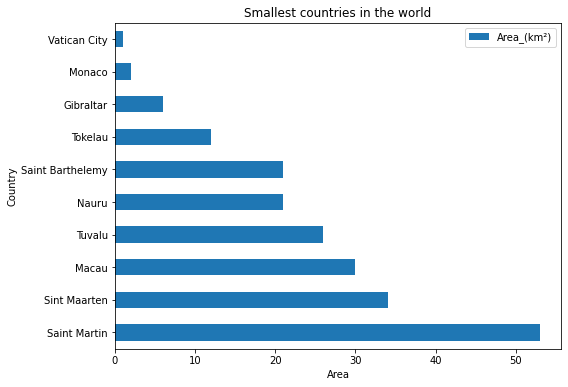

In [46]:
top10_smallest.plot(kind='barh',x='Country',y='Area_(km²)',figsize=(8,6))
plt.xlabel("Area")
plt.title("Smallest countries in the world")

*Vatican City is the smallest country in the world *

List of continents by population

In [47]:
grouped_by_continent = data.groupby("Continent")
grouped_by_continent["2020_Population"].sum()


Continent
Africa           1360671810
Asia             4663086535
Europe            745792196
North America     594236593
Oceania            43933426
South America     431530043
Name: 2020_Population, dtype: int64

In [48]:
import plotly.express as px

NUMBER OF PEOPLE BY COUNTRIES(2022)

In [49]:
sum_country_2022 = data.groupby(by = 'Country')['2022_Population'].sum().sort_values(ascending=False).head(8)
fig = px.bar(y=sum_country_2022.values, 
             x=sum_country_2022.index, 
             color = sum_country_2022.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_2022.values,
             title= 'Number of people by countries(2022)',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

*As of 2022,China is the most populous country.*

# Growth rate by continents

In [50]:
sum_country_2022 = data.groupby(by = 'Continent')['Growth_Rate'].sum().sort_values(ascending=False).head()
fig = px.bar(y=sum_country_2022.values, 
             x=sum_country_2022.index, 
             color = sum_country_2022.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_2022.values,
             title= 'Growth rate by continents ',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Continent",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

Africa has the highest population growth compared to other continents.

Text(0.5, 1.0, 'Asia Population Graph')

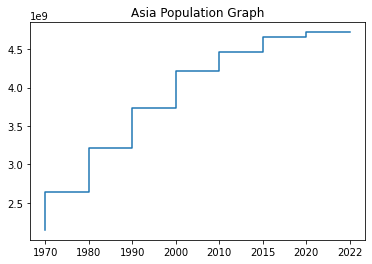

In [51]:
years = ["1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022"]
Asia = [grouped_by_continent["1970_Population"].sum()[1], grouped_by_continent["1980_Population"].sum()[1], grouped_by_continent["1990_Population"].sum()[1], grouped_by_continent["2000_Population"].sum()[1], grouped_by_continent["2010_Population"].sum()[1], grouped_by_continent["2015_Population"].sum()[1], grouped_by_continent["2020_Population"].sum()[1], grouped_by_continent["2022_Population"].sum()[1]]
plt.step(years, Asia)
plt.title("Asia Population Graph")

Text(0.5, 1.0, 'Africa Population Graph')

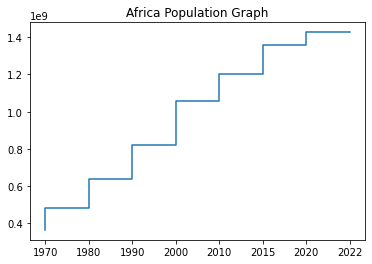

In [52]:
Africa = [grouped_by_continent["1970_Population"].sum()[0], grouped_by_continent["1980_Population"].sum()[0], grouped_by_continent["1990_Population"].sum()[0], grouped_by_continent["2000_Population"].sum()[0], grouped_by_continent["2010_Population"].sum()[0], grouped_by_continent["2015_Population"].sum()[0], grouped_by_continent["2020_Population"].sum()[0], grouped_by_continent["2022_Population"].sum()[0]]
plt.step(years, Africa)
plt.title("Africa Population Graph")

Text(0.5, 1.0, 'Europe Population Graph')

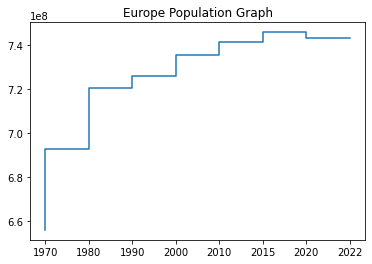

In [53]:
Europe = [grouped_by_continent["1970_Population"].sum()[2], grouped_by_continent["1980_Population"].sum()[2], grouped_by_continent["1990_Population"].sum()[2], grouped_by_continent["2000_Population"].sum()[2], grouped_by_continent["2010_Population"].sum()[2], grouped_by_continent["2015_Population"].sum()[2], grouped_by_continent["2020_Population"].sum()[2], grouped_by_continent["2022_Population"].sum()[2]]
plt.step(years, Europe)
plt.title("Europe Population Graph")

Text(0.5, 1.0, 'North_America Population Graph')

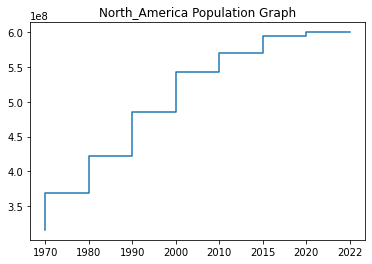

In [54]:
North_America = [grouped_by_continent["1970_Population"].sum()[3], grouped_by_continent["1980_Population"].sum()[3], grouped_by_continent["1990_Population"].sum()[3], grouped_by_continent["2000_Population"].sum()[3], grouped_by_continent["2010_Population"].sum()[3], grouped_by_continent["2015_Population"].sum()[3], grouped_by_continent["2020_Population"].sum()[3], grouped_by_continent["2022_Population"].sum()[3]]
plt.step(years, North_America)
plt.title("North_America Population Graph")

Text(0.5, 1.0, 'Oceania Population Graph')

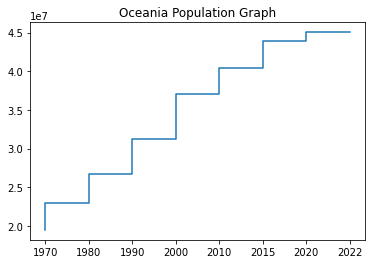

In [55]:
Oceania = [grouped_by_continent["1970_Population"].sum()[4], grouped_by_continent["1980_Population"].sum()[4], grouped_by_continent["1990_Population"].sum()[4], grouped_by_continent["2000_Population"].sum()[4], grouped_by_continent["2010_Population"].sum()[4], grouped_by_continent["2015_Population"].sum()[4], grouped_by_continent["2020_Population"].sum()[4], grouped_by_continent["2022_Population"].sum()[4]]
plt.step(years, Oceania)
plt.title("Oceania Population Graph")

Text(0.5, 1.0, 'South_America Population Graph')

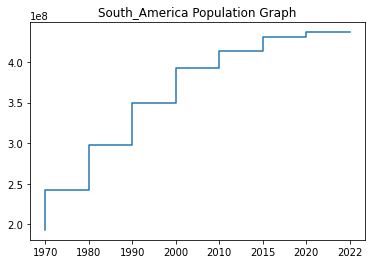

In [56]:
South_America = [grouped_by_continent["1970_Population"].sum()[5], grouped_by_continent["1980_Population"].sum()[5], grouped_by_continent["1990_Population"].sum()[5], grouped_by_continent["2000_Population"].sum()[5], grouped_by_continent["2010_Population"].sum()[5], grouped_by_continent["2015_Population"].sum()[5], grouped_by_continent["2020_Population"].sum()[5], grouped_by_continent["2022_Population"].sum()[5]]
plt.step(years, South_America)
plt.title("South_America Population Graph")

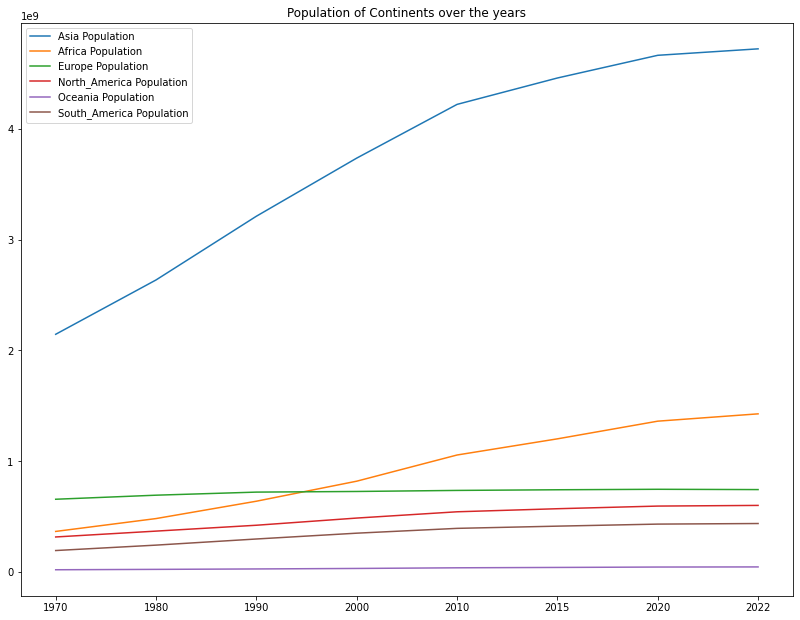

In [57]:
plt.figure(constrained_layout=True, figsize=(11, 8.5))
plt.plot(years, Asia, label='Asia Population')  
plt.plot(years, Africa, label='Africa Population')  
plt.plot(years, Europe, label='Europe Population')
plt.plot(years, North_America, label='North_America Population')
plt.plot(years, Oceania, label='Oceania Population')
plt.plot(years, South_America, label='South_America Population')
plt.title("Population of Continents over the years")
plt.legend();

*The rate of population growth varies greatly from one continent to another.


In [58]:
import matplotlib
import plotly.express as px

Population rate year wise

In [59]:
pop_diff = ((data.groupby(by = 'Country')['2022_Population'].sum()) - (data.groupby(by = 'Country')['1980_Population'].sum())).sort_values(ascending=False).head(8)
fig = px.bar(y=pop_diff.values, 
             x=pop_diff.index, 
             color = pop_diff.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=pop_diff.values,
             title= 'Population Growth in 40 Years',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()


*India has the highest population growth rate.

In [60]:
fig = px.choropleth(data,
                     locations='Country',
                     locationmode='country names',
                     color='Growth_Rate',
                     color_continuous_scale='Viridis',
                     template='plotly_dark',
                     title = 'Growth_Rate')


fig.update_layout(font = dict(size = 17, family="Franklin Gothic"))

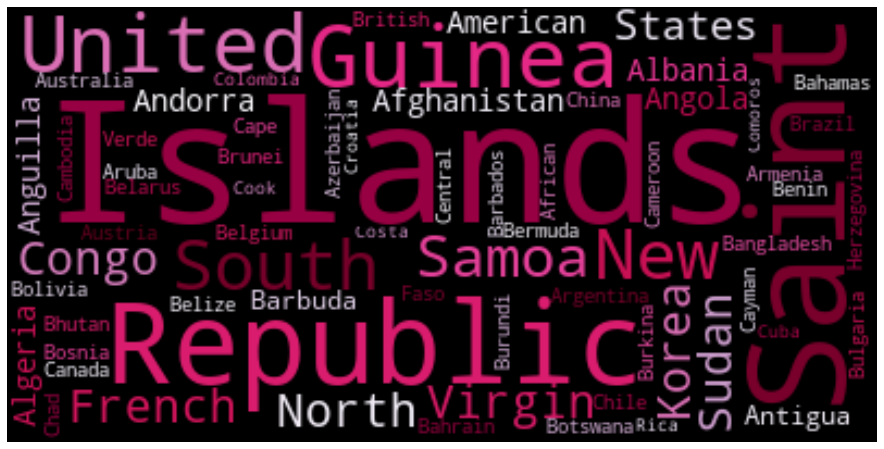

In [61]:
import os
from wordcloud import WordCloud
text = " ".join(subject_titles for subject_titles in data["Country"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 8).generate(text)
plt.figure(figsize = (20, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

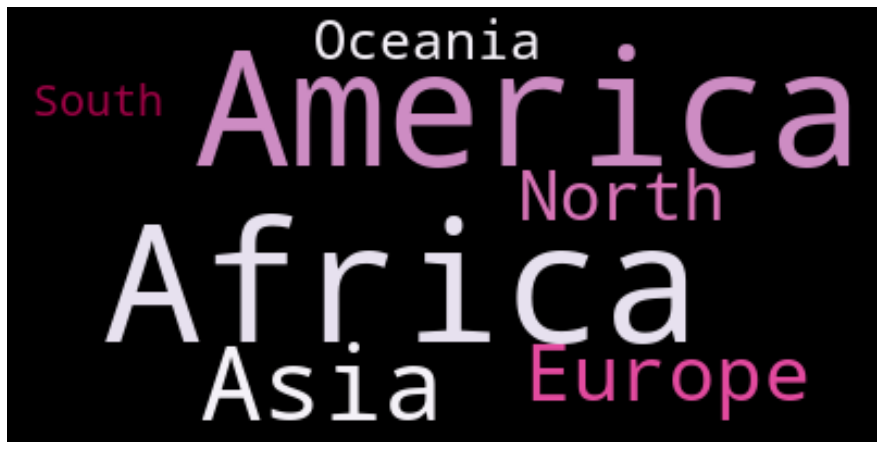

In [62]:
import os
from wordcloud import WordCloud
text = " ".join(subject_titles for subject_titles in data["Continent"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'PuRd', min_font_size = 8).generate(text)
plt.figure(figsize = (20, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


#Few findings and Insights from the world population dataset

*China and India are the two countries with the largest population and population growth in the world.

*The African continent has the highest growth rate compared to other continents.

*Asia population is equivalent to 59.2% of the total world population.

*Asia ranks number 1 among regions of the world by population.

*The ten most populous countries in 2022 are China, India, followed by the United States, Indonesia, and Pakistan, Nigeria, Brazil, Bangladesh, Russia, and Mexico.

*India is having less area but more population.

*Africa is the second most largest continent by population, with 17% of the world's population.

*India has the highest population growth,if this continuos india may overtake china to become the world's most populous nation.

